# Ford GoBike

## by Mohamed Gouda

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li> 
    
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <div><li><a href="#sec1">Sec 1: Start Time</a></li></div>
        <div><li><a href="#sec2">Sec 2: Start & End Stations</a></li></div>
        <div><li><a href="#sec3">Sec 3: Gender</a></li></div>
        <div><li><a href="#sec4">Sec 4: User Type</a></li></div>
        <div><li><a href="#sec5">Sec 5: Birth Year</a></li></div>
        <div><li><a href="#sec6">Sec 6: Business Development</a></li></div>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will try to look at data from Ford GoBike system so, let's introduce the main features of our data.

The data contains information about Boston, US from 2017 to 2020. we made this data by collecting the data of each month from 2017 to 2020, and made them in a one data frame, in order to get some useful insights, and contains the following columns:
- Trip Duration (seconds) : the data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).
- Start Time and Date
- Stop Time and Date
- Start Station Name & ID
- End Station Name & ID
- Bike ID
- User Type (Casual = Single Trip or Day Pass user; Member = Annual or Monthly Member)
- Birth Year
- Gender, self-reported by member (Zero=unknown; 1=male; 2=female)

We are going to explore the data features through six sections. Each section contains one or more variable that we think it would be useful for our analysis<br>
Sec 1: Start Time <br>
Sec 2: Start & End Stations<br>
Sec 3: Gender<br>
Sec 4: User Type<br>
Sec 5: Birth Year<br>
Sec 6: Business Development

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings
warnings.filterwarnings('ignore')

sb.set(style='dark', font_scale=1.5)
%matplotlib inline

In [2]:
# turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# getting all the file in one dataframe
df = pd.DataFrame()
path = 'data/'
for file in os.listdir(path=path):
    df_file = pd.read_csv(path + file)
    df = df.append(df_file)

In [4]:
# dropping unnecessary columns
cols = ['start station id','start station latitude','start station longitude', 'end station id',
       'end station latitude', 'end station longitude', 'bikeid', 'postal code']
df.drop(cols, axis=1, inplace=True)

In [5]:
# changing columns names and replacing spaces with '_'
df = df.rename(lambda x: x.replace(' ', '_'), axis=1)

In [6]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# changing to int32 for consistency and reducing memory
df['tripduration'] = df['tripduration'].astype(int)

In [8]:
# changin starttime to datetime type
df['starttime'] = pd.to_datetime(df['starttime'])

In [9]:
# getting year, month, day name ... etc.
# changing to int32 for consistency and reducing memory
df['year'] = df['starttime'].dt.year.astype(int)

df['month'] = df['starttime'].dt.month.astype(int)

df['day_name'] = df['starttime'].dt.day_name()

In [10]:
# dropping them after they became unnecessary
df.drop(['starttime', 'stoptime'], axis=1, inplace=True)

> As we have data from 2017 to 2020, it would be a geed idea to change them into ordered categorical values

In [11]:
# years in ascending order
years = [2017, 2018, 2019, 2020]

# changing into categorical type
year_type = pd.api.types.CategoricalDtype(categories=years, ordered=True)
df['year'] = df['year'].astype(year_type)

> I think depending on trip duration in minutes will be much more practical and suitable for the analysis process

In [12]:
# making a column for trip duration in minutes
df['trip_duration_min'] = df['tripduration'] // 60
df.head()

,tripduration,start_station_name,end_station_name,usertype,birth_year,gender,year,month,day_name,trip_duration_min
0,350,MIT at Mass Ave / Amherst St,Dana Park,Subscriber,1988,1.00,2017,1,Sunday,5
1,891,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,Subscriber,1983,1.00,2017,1,Sunday,14
2,1672,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,Customer,\N,0.00,2017,1,Sunday,27
3,747,Christian Science Plaza,Buswell St. at Park Dr.,Subscriber,1968,1.00,2017,1,Sunday,12
4,621,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,Subscriber,1983,1.00,2017,1,Sunday,10


In [13]:
# checking for NaNs
df.isna().sum()

tripduration                0
start_station_name          0
end_station_name            0
usertype                    0
birth_year            1667063
gender                1657472
year                        0
month                       0
day_name                    0
trip_duration_min           0
dtype: int64

>- It looks like there are NaNs only in birth year and gender columns, so I decided to put them in another dataframe, and drop NaNs from the new dataframe
>- After that I dropped these columns from the main dataframe.

In [14]:
# making a new df with no NaNs for gender and birth year
df_gender_birth = df.dropna()
df_gender_birth.isna().sum()

tripduration          0
start_station_name    0
end_station_name      0
usertype              0
birth_year            0
gender                0
year                  0
month                 0
day_name              0
trip_duration_min     0
dtype: int64

>- I tried to change the birth year column to int, but it showed an error, so I checked for unique values, and found this Nan value '\\N'.
>- After that I dropped this value, and changed the column to int.

In [15]:
# Checking for unique values
df_gender_birth['birth_year'].unique()

array(['1988', '1983', '\\N', '1968', '1972', '1994', '1993', '1990',
       '1980', '1985', '1992', '1975', '1971', '1969', '1987', '1962',
       '1991', '1984', '1970', '1989', '1986', '1967', '1982', '1974',
       '1963', '1961', '1957', '1958', '1996', '1981', '1959', '1998',
       '1960', '1976', '1956', '1978', '1947', '1953', '1997', '1951',
       '1973', '1979', '1965', '1966', '1954', '1944', '1950', '1977',
       '1964', '1995', '1999', '1955', '1946', '1948', '2000', '1949',
       '1941', '1952', '1934', '1942', '1937', '1945', '1933', '1917',
       '1943', '1939', '1902', '1886', '1900', '2001', '1887', '1901',
       '1929', '1940', 1992.0, 1990.0, 1993.0, 1986.0, 1980.0, 1989.0,
       1994.0, 1984.0, 1957.0, 1991.0, 1954.0, 1996.0, 1959.0, 1969.0,
       1963.0, 1975.0, 1997.0, 1983.0, 1965.0, 1970.0, 1978.0, 1988.0,
       1995.0, 1982.0, 1956.0, 1972.0, 1976.0, 1962.0, 1966.0, 1967.0,
       1981.0, 1974.0, 1985.0, 1979.0, 1973.0, 1961.0, 1958.0, 1987.0,
       

In [16]:
# dropping this value
df_gender_birth = df_gender_birth[df_gender_birth['birth_year'] != '\\N']

In [17]:
# changing to int32 for consistency and reducing memory
df_gender_birth['birth_year'] = df_gender_birth['birth_year'].astype(
    float).astype(int)
df_gender_birth['gender'] = df_gender_birth['gender'].astype(int)

In [18]:
# to reduce the possibiliy of outliers on birth year accepting only those with birth year more than 1930
df_gender_birth = df_gender_birth[df_gender_birth['birth_year'] > 1930]

In [19]:
# As we are going to compare gender we will drop unknown ones which are of zero
df_gender_birth = df_gender_birth[df_gender_birth['gender'] != 0]

>- After separating gender and birth into another column, now, we should drop them from the main dataframe.

In [20]:
# dropping columns
cols = ['gender', 'birth_year']
df.drop(cols, inplace=True, axis=1)

<a id='eda'></a>
## Exploratory data analysis

<a id='sec1'></a>
## Sec 1: Start Time


In this section, we are going to look through variables associated with the start time of the trip as days of the week and months. <br>
We will look through the distribution of trips along days and months, and then compare their average trip duration in minutes. 
<br>
In this section, we are going to answer 4 main questions which are: <br>
- `1` What is the distribution of trips during days of the week?<br>
- `2` What is the distribution of trips during different months?<br>
- `3` What is the average trip duration for different days of the week?<br>
- `4` What is the average trip duration for different months?

### `Q1` What is the distribution of trips during days of the week?
- It seems that Wednesday has the biggest share of bike trips.
- It is also quite interesting that weekends, Saturday and Sunday, have lower rate than weekdays.

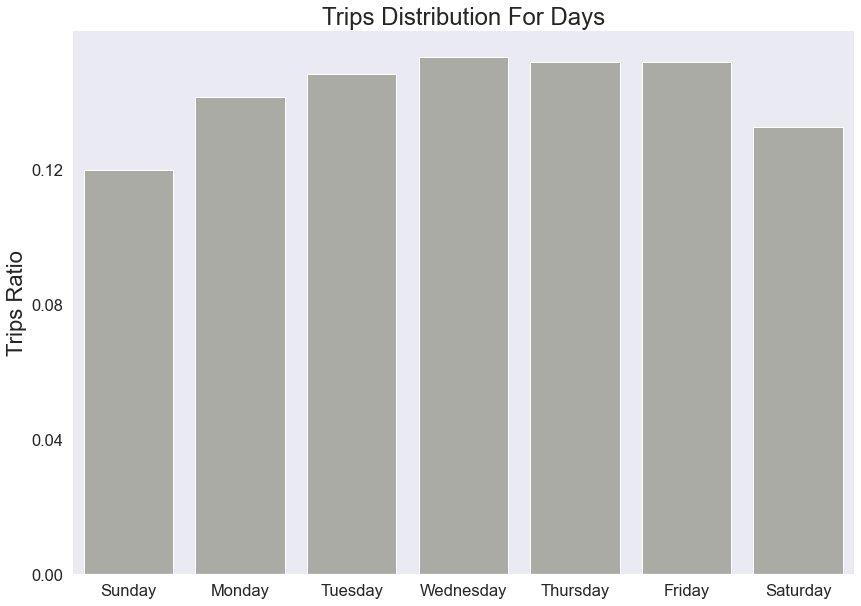

In [21]:
# setting figure size
plt.figure(figsize=[14, 10])

# color and plotting
base_color = '#acaca4'
ax = sb.countplot(data=df, x='day_name', color=base_color)

# getting relative results
tot = df.shape[0]
top_day = df.day_name.value_counts()[0]
max_prop_day = top_day / tot

# setting up ticks
ticks_y = np.arange(0, max_prop_day, .04)
labels_y = ['{:.2f}'.format(x) for x in ticks_y]
plt.yticks(ticks=ticks_y*tot, labels=labels_y)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Trips Distribution For Days', fontsize=24)
plt.xlabel('')
plt.ylabel('Trips Ratio', fontsize=22);

### `Q2` What is the distribution of trips during different months?
- When looking at the distribution of months, we could see a pretty interesting trend, the usage of bikes dramatically decreased in winter periods, which may be due to the risk of using bikes in these days.
- On the other hand, it increases to reach its highest values in summer, and in the first half of fall.

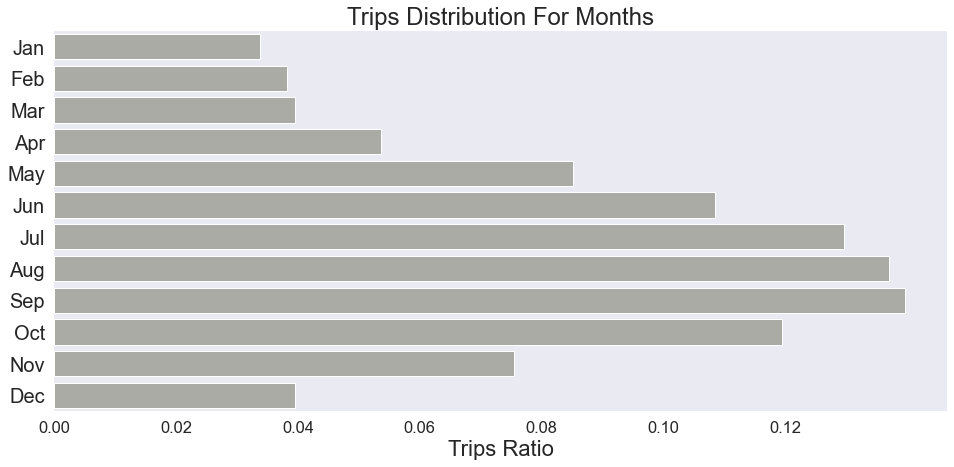

In [22]:
# setting figure size
plt.figure(figsize=[16, 7])

# color and plotting
base_color = '#acaca4'
ax = sb.countplot(data=df, y='month', color=base_color)

# getting relative results
tot = df.shape[0]
top_month = df.month.value_counts().max()
max_prop_month = top_month / tot

# setting up xticks
ticks_x = np.arange(0., max_prop_month, .02)
labels_x = ['{:.2f}'.format(x) for x in ticks_x]
plt.xticks(ticks=ticks_x*tot, labels=labels_x)

# setting up yticks
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ticks_y = np.arange(0, 12)
plt.yticks(ticks=ticks_y, labels=months_names, fontsize=20)

# Hide the right, bottom and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Trips Distribution For Months', fontsize=24)
plt.ylabel('')
plt.xlabel('Trips Ratio', fontsize=22);

###  `Q3` What is the average trip duration for different days of the week?
Although Sunday and Saturday had the lowest usage rate, the average trip duration for them is much higher.

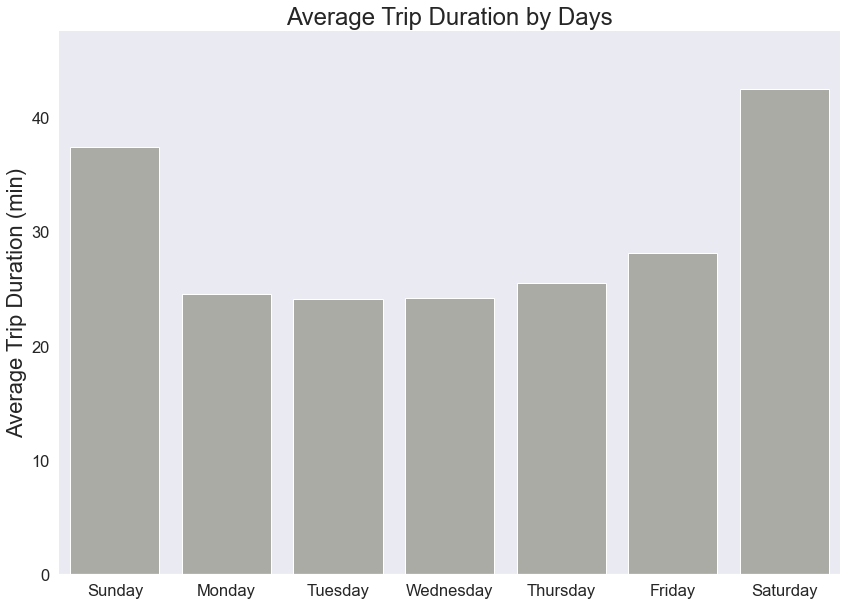

In [23]:
# setting figure size
plt.figure(figsize=[14, 10])

# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df, x='day_name', y='trip_duration_min',
                color=base_color, errwidth=0)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration by Days', fontsize=24)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=22)
plt.show()

###  `Q4` What is the average trip duration for different months?
In addition that most trips were in summer months, the average trip duration is also higher in summer.

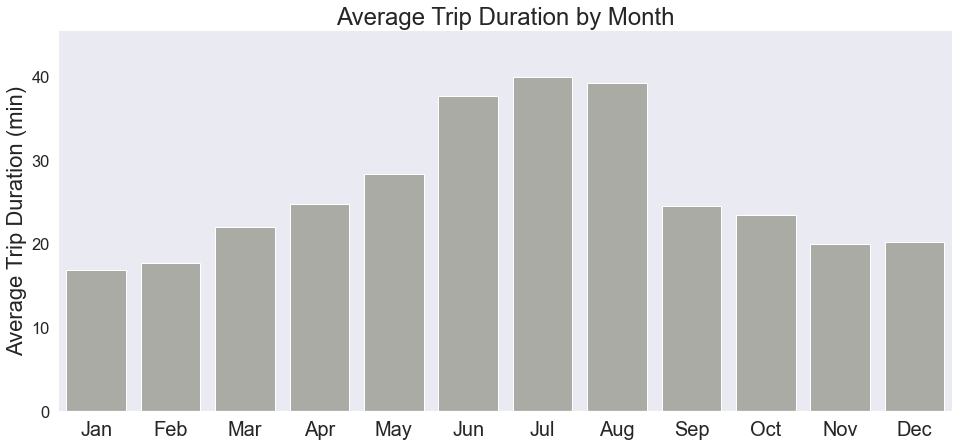

In [24]:
# setting figure size
plt.figure(figsize=[16, 7])

# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df, x='month', y='trip_duration_min',
                color=base_color, errwidth=0)

# setting up xticks
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ticks_x = np.arange(0, 12)
plt.xticks(ticks=ticks_x, labels=months_names, fontsize=20)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration by Month', fontsize=24)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=22)
plt.show()

<a id='sec2'></a>
## Sec 2: Start & End Stations

In this section, we will go through start and end stations to get to know the top 5 start and end stations, and compare the average trip duration associated with these stations.<br>
In this section, we are going to answer 2 main questions:<br>
`1` What is the average trip duration associated with the top 5 start station?<br>
`2` What is the average trip duration associated with the top 5 end station?

### `Q1` What is the average trip duration associated with the top 5 start station?
- The top 5 start stations for trips are shown below in the chart arranged from top to bottom where 'MIT at Mass Ave / Amherst St' is the top one, and three stations of the top 5 are in 'MIT'.
- On the other hand, 'South Station - 700 Atlantic Ave' has the highest average trip duration with a far higher range than the second one.

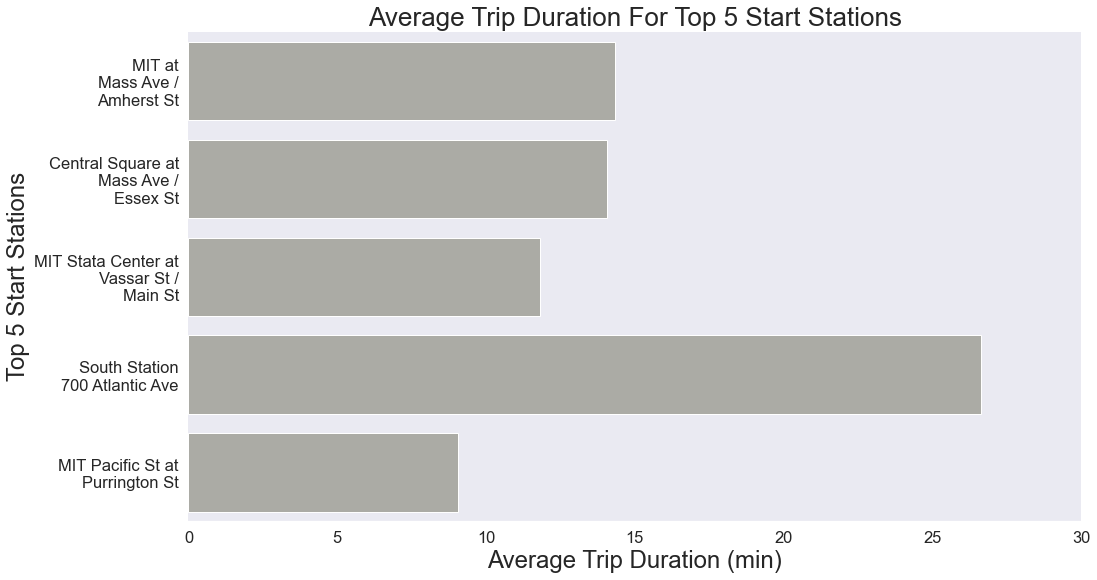

In [25]:
# setting figure size
plt.figure(figsize=[16, 9])

# getting the top 5 start stations indicies
top5_start_stations = df.start_station_name.value_counts()[:5].index

# making a new df for these indicies
df_top5_start_stations = df[df['start_station_name'].isin(top5_start_stations) == True]

# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df_top5_start_stations, y='start_station_name', x='trip_duration_min',
                color=base_color, errwidth=0, order=top5_start_stations)

# setting ylabels to fit long names
pos, labels = plt.yticks()
new_labels = [x.get_text().replace(' at ', ' at\n').replace(
    ' / ', ' /\n').replace(' - ', '\n') for x in labels]
plt.yticks(pos, new_labels)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# setting xlim
plt.xlim(0, 30)

# Polishing the figure
plt.title('Average Trip Duration For Top 5 Start Stations', fontsize=26)
plt.ylabel('Top 5 Start Stations', fontsize=24)
plt.xlabel('Average Trip Duration (min)', fontsize=24)
plt.show()

### `Q2` What is the average trip duration associated with the top 5 end stations?
- It looks like the top 3 start and end stations are the same, starting from top to bottom 'MIT at Mass Ave / Amherst St', 'Central Square at Mass Ave / Essex St' and 'MIT Stata Center at Vassar St'.
- On the other hand 'Nashua Street at Red Auerbach Way' has the highest average trip duration with a quite less range than the others this time.

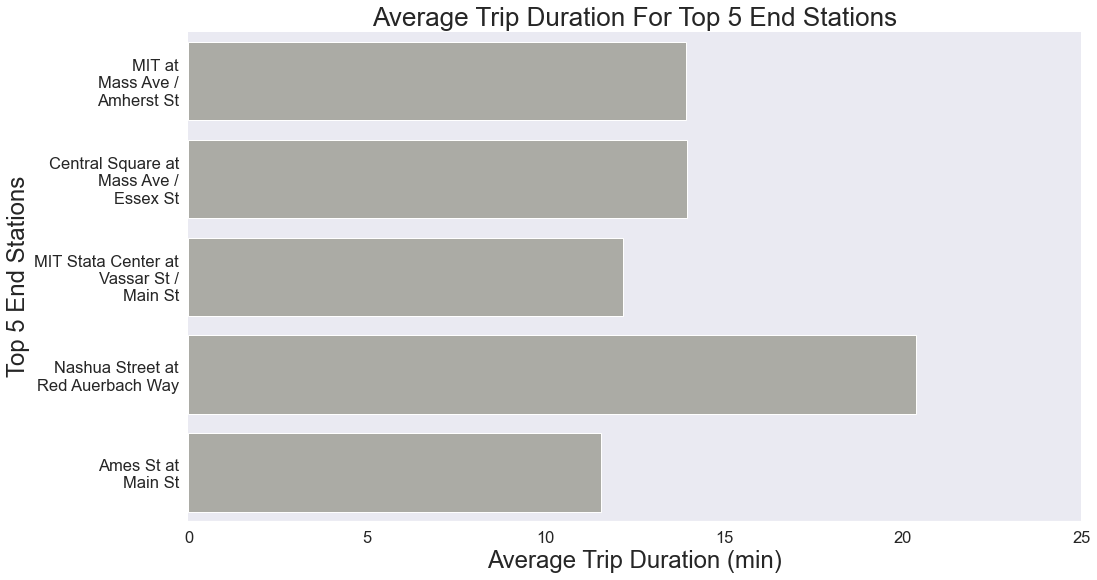

In [26]:
# setting figure size
plt.figure(figsize=[16, 9])

# getting the top 5 end stations indicies
top5_end_stations = df.end_station_name.value_counts()[:5].index

# making a new df for these indicies
df_top5_end_stations = df[df['end_station_name'].isin(top5_end_stations) == True]

# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df_top5_end_stations, y='end_station_name', x='trip_duration_min',
                color=base_color, errwidth=0, order=top5_end_stations)

# setting ylabels to fit long names
pos, labels = plt.yticks()
new_labels = [x.get_text().replace(' at ', ' at\n').replace(
    ' / ', ' /\n').replace(' - ', '\n') for x in labels]
plt.yticks(pos, new_labels)

# setting xlim
plt.xlim(0, 25)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration For Top 5 End Stations', fontsize=26)
plt.ylabel('Top 5 End Stations', fontsize=24)
plt.xlabel('Average Trip Duration (min)', fontsize=24)
plt.show()

<a id='sec3'></a>
## Sec 3: Gender


In this section, we will go through gender variable to see gender distribution, and what percentage of each gender there are.<br>
We will also look through the average trip duration associated with each gender and different days of the week.<br>
In this section, we have two main questions to answer:<br>
`1` What is the distribution of each gender that uses Ford GoBike, and what is the average trip duration of them?<br>
`2` What is the average trip duration associated with gender and different days of the week?

### `Q1` What is the distribution of each gender that uses Ford GoBike, and what is the average trip duration of them?
It seems that males use Ford GoBike with a much higher rate than females with about 75% while females have have a little bit higher average trip duration rate. 

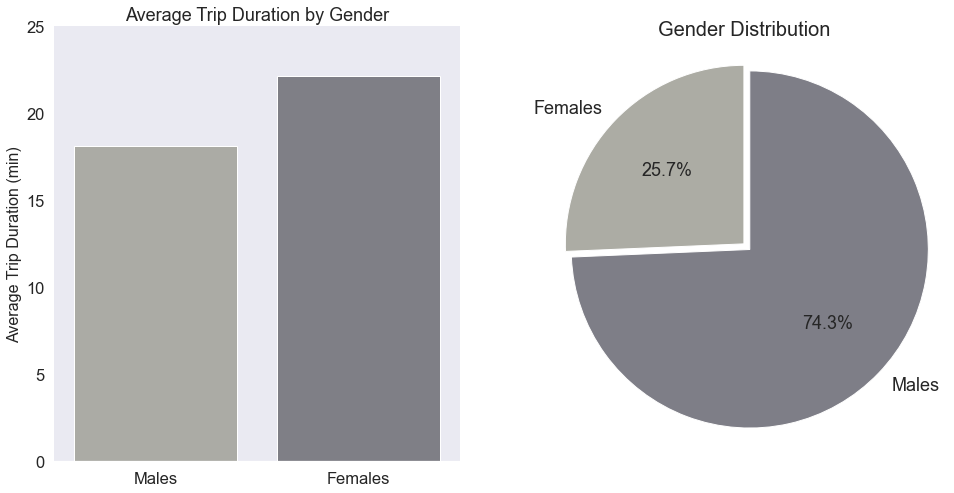

In [27]:
plt.figure(figsize=[16, 8])

# making the shape to the left a bar chart to show gender distribution with average trip duration
plt.subplot(1, 2, 1)

# color and plotting
palette = ['#acaca4', '#7e7e87']
ax = sb.barplot(data=df_gender_birth, x='gender',
                y='trip_duration_min', palette=palette, errwidth=0)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# setting xlabels
labels = ['Males', 'Females']
plt.xticks([0, 1], labels)

# setiing ylims
plt.ylim(0, 25)


# Polishing the figure
plt.title('Average Trip Duration by Gender', fontsize=18)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=16)


# making the shape to the right a pie plot to show gender distribution
plt.subplot(1, 2, 2)

colors = ['#7e7e87', '#acaca4']
# getting values of each gender
sorted_counts = df_gender_birth.gender.value_counts()
labels = ['Males', 'Females']

# plotting the pie
plt.pie(x=sorted_counts, labels=labels, startangle=90, counterclock=False,
        autopct='%1.1f%%', explode=[0.05, 0], colors=colors, radius=1.1, textprops={'fontsize': 18})
plt.title('Gender Distribution', fontsize=20)
plt.show()

### `Q2` What is the average trip duration associated with gender and different days of the week?
As before the average trip duration for females is higher on all days of the week, with Saturday and Sunday have the highest average trip duration.

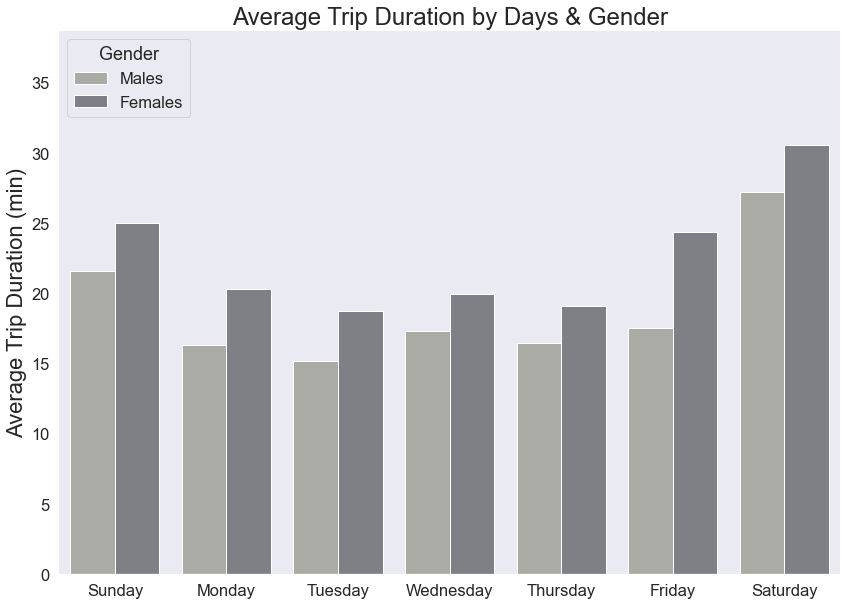

In [28]:
# setting figure size
plt.figure(figsize=[14, 10])

# color and plotting
palette = ['#acaca4', '#7e7e87']
ax = sb.barplot(data=df_gender_birth, x='day_name', y='trip_duration_min',
                palette=palette, errwidth=0, hue='gender')

# Polishing the figure
plt.title('Average Trip Duration by Days & Gender', fontsize=24)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=22)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# adjusting legends
legends = plt.legend(title='Gender')
labels = ['Males', 'Females']
i = 0
for label in labels:
    legends.get_texts()[i].set_text(label)
    i += 1
plt.show()

<a id='sec4'></a>
## Sec 4: User Type

In this section, we will go through user type variable to see users distribution, and what percentage of customers and subscribers there are.<br>
We will also look through the average trip duration associated with each user type and different days of the week.<br>
In this section, we have two main questions to answer:<br>
`1` What is the distribution of each user type that uses Ford GoBike, and what is the average trip duration for them? <br>
`2` What is the average trip duration associated with user type and different days of the week?

### `Q1` What is the distribution of each user type that uses Ford GoBike, and what is the average trip duration for them? 
It looks that Ford GoBike has a really high subscription rate with about 92%.<br>
On the other hand, the average trip duration for customers is much higher than that for subscribers. This could make a lot of sense when we think of it in the following way as subscribers tend to have a specific routine, and they tend to stick with it while customers tend to have longer trips as they do not do this as a part of their daily routine.

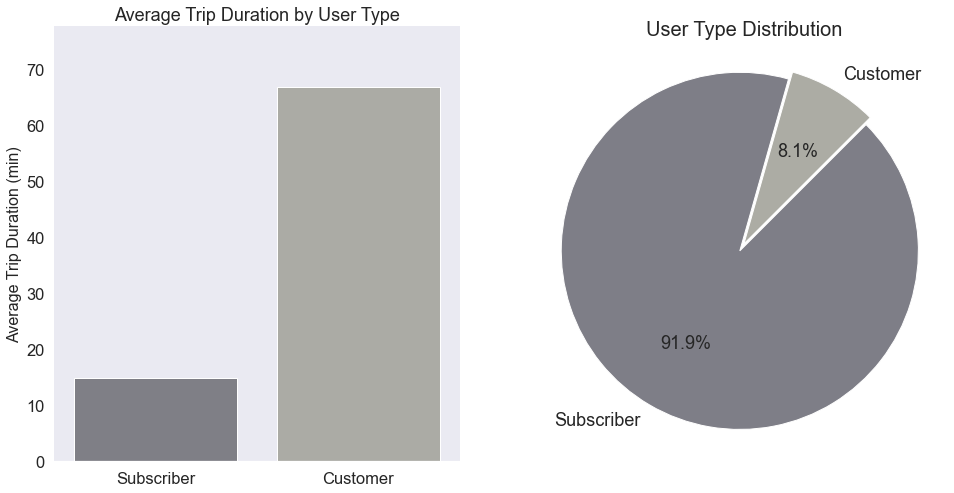

In [29]:
plt.figure(figsize=[16, 8])

# making the shape to the left a bar chart to show user type distribution with average trip duration
plt.subplot(1, 2, 1)

# color and plotting
palette = ['#7e7e87', '#acaca4']
ax = sb.barplot(data=df_gender_birth, x='usertype',
                y='trip_duration_min', palette=palette, errwidth=0)

# Polishing the figure
plt.title('Average Trip Duration by User Type', fontsize=18)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=16)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# making the shape to the right a pie plot to show user type distribution
plt.subplot(1, 2, 2)

colors = ['#7e7e87', '#acaca4']
# getting values of each gender
sorted_counts = df_gender_birth.usertype.value_counts()
labels = sorted_counts.index
# plotting the pie
plt.pie(x=sorted_counts, startangle=45, counterclock=False, labels=labels,
        autopct='%1.1f%%', explode=[0.05, 0], colors=colors,
        radius=1.1, textprops={'fontsize': 18})
plt.title('User Type Distribution', fontsize=20)
plt.show()

### `Q2` What is the average trip duration associated with user type and different days of the week?
It seems that as mentioned before, subscribers tend to have a constant specific range that they stick with it while customers tend to a have much higher range, with Saturday has the highest average trip duration for customers.

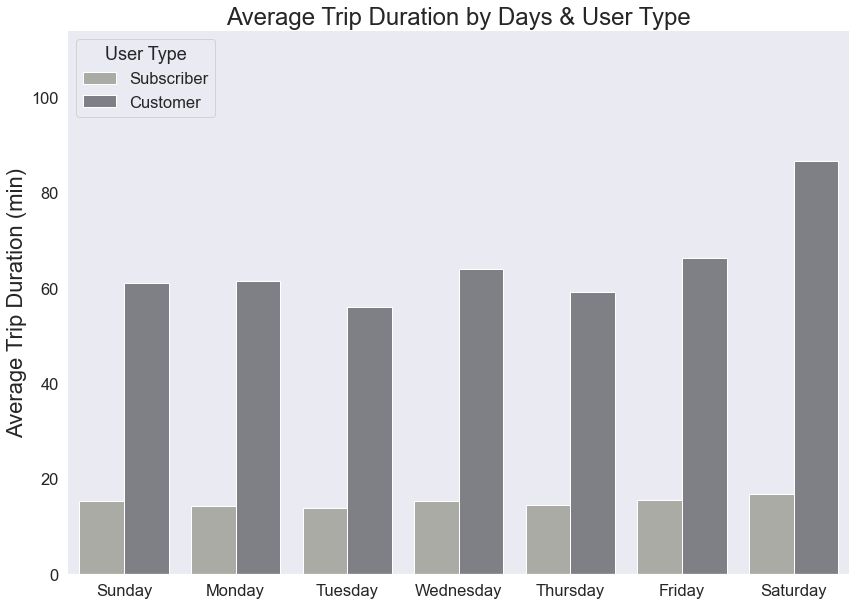

In [30]:
# setting figure size
plt.figure(figsize=[14, 10])

# color and plotting
palette = ['#acaca4', '#7e7e87']
ax = sb.barplot(data=df_gender_birth, x='day_name', y='trip_duration_min',
                palette=palette, errwidth=0, hue='usertype')

# Polishing the figure
plt.title('Average Trip Duration by Days & User Type', fontsize=24)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=22)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# legends
plt.legend(title='User Type')
plt.show()

<a id='sec5'></a>
## Sec 5: Birth Year


In this section, we will go through birth year variable, and try to figure out the top 10 birth years associated with users that use Ford GoBike, and the average trip duration associated with each.<br>
We will also compare those top 10 birth years with gender and user type, and see their average trip duration to try to get some useful insights.<br>
In this section, we have 3 main questions to answer:<br>
`1` What is the top 10 birth years that use Ford GoBike, and the average trip duration associated with each?<br>
`2` For the top 10 birth years, what is the distribution of gender within them, and their average trip duration?<br>
`3` For the top 10 birth years, what is the distribution of user type within them, and their average trip duration?

###  `Q1` What is the top 10 birth years that use Ford GoBike, and the average trip duration associated with each?
In this chart that all the top 10 birth years are arranged from top to bottom, where top is the highest usage rate, and these years range from 1987 to 1996, with 1992 has the highest usage rate, and 1988 has the highest average trip duration.

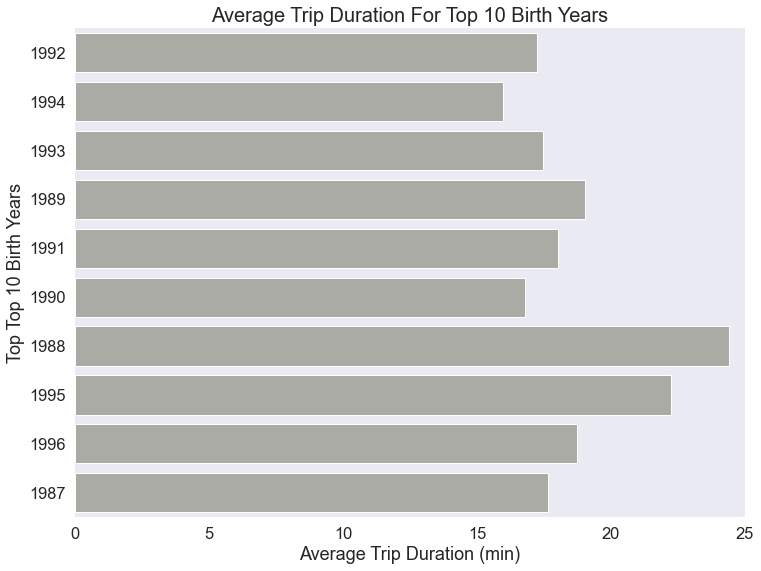

In [31]:
# setting figure size
plt.figure(figsize=[12, 9])

# getting the top 5 end stations indicies
top10_birth_years = df_gender_birth.birth_year.value_counts()[:10].index

# making a new df for these indicies
df_top10_birth_years = df_gender_birth[
    df_gender_birth['birth_year'].isin(top10_birth_years) == True]

# changing years into ordinal categorical data
# from highest bike usage rate to the lowest
bith_years_order = pd.api.types.CategoricalDtype(
    categories=top10_birth_years, ordered=True)
df_top10_birth_years['birth_year'] = df_top10_birth_years['birth_year'].astype(
    bith_years_order)

# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df_top10_birth_years, y='birth_year', x='trip_duration_min',
                color=base_color, errwidth=0)


# setting xlim
plt.xlim(0, 25)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration For Top 10 Birth Years', fontsize=20)
plt.ylabel('Top Top 10 Birth Years', fontsize=18)
plt.xlabel('Average Trip Duration (min)', fontsize=18)
plt.show()

###  `Q2` For the top 10 birth years, what is the distribution of gender within them, and their average trip duration?
Like before the average trip duration in females is higher than that in males, except for 1995, it is slightly higher in males.
<br>
In addition to that, females has a much higher range in 1988 which has the highest average trip duration.

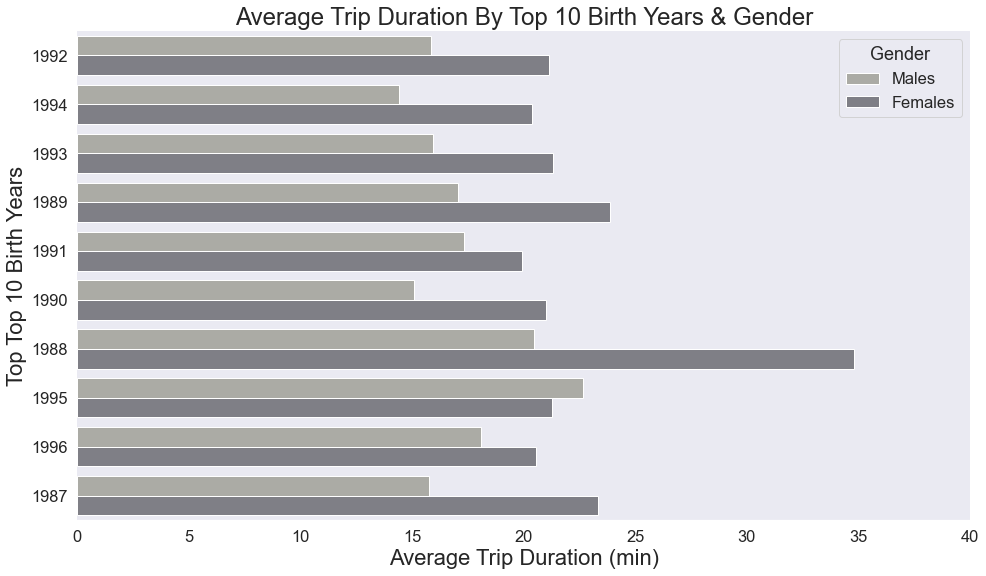

In [32]:
# setting figure size
plt.figure(figsize=[16, 9])

# getting the top 5 end stations indicies
top10_birth_years = df_gender_birth.birth_year.value_counts()[:10].index

# making a new df for these indicies
df_top10_birth_years = df_gender_birth[df_gender_birth['birth_year'].isin(
    top10_birth_years) == True]

# changing years into ordinal categorical data
# from highest bike usage rate to the lowest
bith_years_order = pd.api.types.CategoricalDtype(
    categories=top10_birth_years, ordered=True)
df_top10_birth_years['birth_year'] = df_top10_birth_years['birth_year'].astype(
    bith_years_order)

# color and plotting
palette = ['#acaca4', '#7e7e87']
ax = sb.barplot(data=df_top10_birth_years, y='birth_year', x='trip_duration_min',
                palette=palette, errwidth=0, hue='gender')

# setting xlim
plt.xlim(0, 40)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration By Top 10 Birth Years & Gender', fontsize=24)
plt.ylabel('Top Top 10 Birth Years', fontsize=22)
plt.xlabel('Average Trip Duration (min)', fontsize=22)

# adjusting legends
legends = plt.legend(title='Gender')
labels = ['Males', 'Females']
i = 0
for label in labels:
    legends.get_texts()[i].set_text(label)
    i += 1
plt.show()

### `Q3` For the top 10 birth years, what is the distribution of user type within them, and their average trip duration?
Again subscribers tend to have a quite constant average trip duration around 15 and 20 minutes while customers has a much higher average trip duration especially for 1988 which has the highest average trip duration overall.

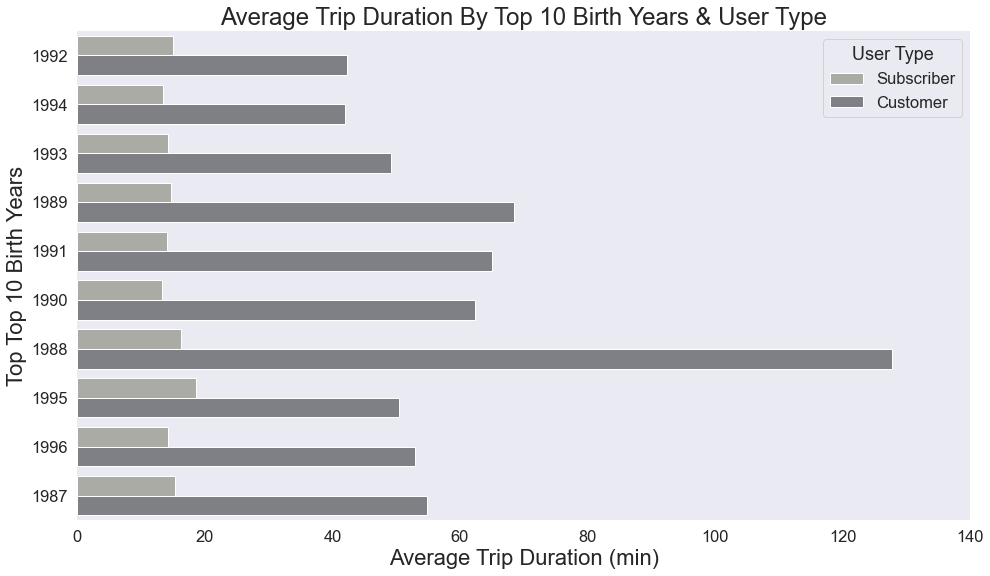

In [33]:
# setting figure size
plt.figure(figsize=[16, 9])

# getting the top 5 end stations indicies
top10_birth_years = df_gender_birth.birth_year.value_counts()[:10].index

# making a new df for these indicies
df_top10_birth_years = df_gender_birth[df_gender_birth['birth_year'].isin(
    top10_birth_years) == True]

# changing years into ordinal categorical data
# from highest bike usage rate to the lowest
bith_years_order = pd.api.types.CategoricalDtype(
    categories=top10_birth_years, ordered=True)
df_top10_birth_years['birth_year'] = df_top10_birth_years['birth_year'].astype(
    bith_years_order)

# color and plotting
palette = ['#acaca4', '#7e7e87']
ax = sb.barplot(data=df_top10_birth_years, y='birth_year', x='trip_duration_min',
                palette=palette, errwidth=0, hue='usertype')
# setting xlim
plt.xlim(0, 140)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Average Trip Duration By Top 10 Birth Years & User Type', fontsize=24)
plt.ylabel('Top Top 10 Birth Years', fontsize=22)
plt.xlabel('Average Trip Duration (min)', fontsize=22)

# legends
plt.legend(title='User Type')
plt.show()

<a id='sec6'></a>
## Sec 6: Business Development


In this section, we will try to see how the business of Ford GoBike was doing from 2017 to 2020, and how was it affected by (COVID-19) during 2020.<br>
In this section, we have two main questions to answer:<br>
`1` How was the business of Ford GoBike doing from 2017 to 2020, and how was it affected by (COVID-19) during 2020?<br>
`2` How was the average trip duration from 2017 to 2020, and how was it affected by (COVID-19) during 2020?

### `Q1` How was the business of Ford GoBike doing from 2017 to 2020, and how was it affected by (COVID-19) during 2020?
Ford GoBike business was increasing year after year at a very high rate, but it was extremely affected by (COVID-19) during 2020 that it had the lowest trips ratio.

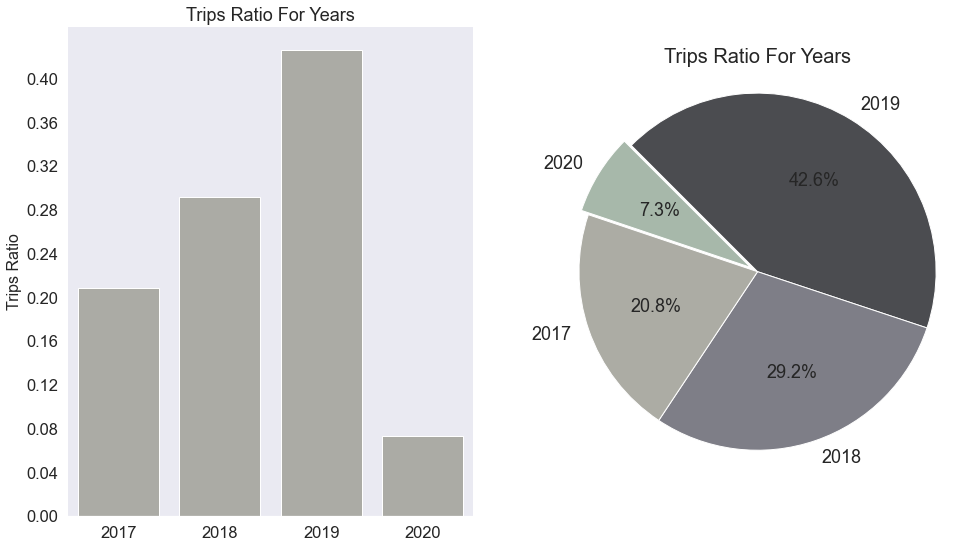

In [34]:
# setting figure size
plt.figure(figsize=[16, 9])

# making the shape to the left a bar plot to show Years distribution
plt.subplot(1, 2, 1)

# color and plotting
base_color = '#acaca4'
ax = sb.countplot(data=df_gender_birth, x='year', color=base_color)

# getting relative results
tot = df_gender_birth.shape[0]
top_year = df_gender_birth.year.value_counts()[0]
max_prop_year = top_year / tot

# setting up ticks
ticks_y = np.arange(0, max_prop_year, 0.04)
labels_y = ['{:.2f}'.format(x) for x in ticks_y]
plt.yticks(ticks=ticks_y*tot, labels=labels_y)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Trips Ratio For Years', fontsize=18)
plt.xlabel('')
plt.ylabel('Trips Ratio', fontsize=16)


# making the shape to the right a pie plot to show Years distribution
plt.subplot(1, 2, 2)

# getting values of each gender
sorted_counts = df_gender_birth.year.value_counts()
labels = sorted_counts.index

# plotting the pie
colors = ['#4b4c50', '#7e7e87', '#acaca4', '#a7b8aa']
plt.pie(x=sorted_counts, startangle=135, counterclock=False, labels=labels,
        autopct='%1.1f%%', explode=[0.0, 0, 0, 0.05], colors=colors,
        radius=1.1, textprops={'fontsize': 18})
plt.title('Trips Ratio For Years', fontsize=20)
plt.show()

### `Q2` How was the average trip duration from 2017 to 2020, and how was it affected by (Covid-19) during 2020?
Besides that the usage of Ford GoBike was increasing over years, the average trip duration was also increasing.<br>
In addition to that, (COVID-19) affected trips ratio in 2020, it has also slightly affected the average trip duration in 2020.

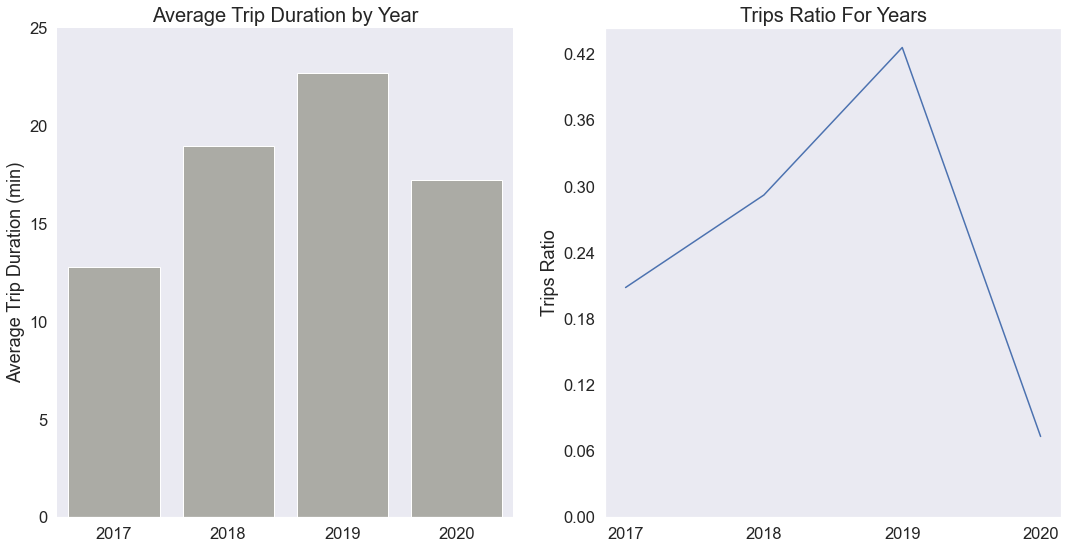

In [35]:
# setting figure size
plt.figure(figsize=[18, 9])

plt.subplot(1, 2, 1)
# color and plotting
base_color = '#acaca4'
ax = sb.barplot(data=df_gender_birth, x='year', y='trip_duration_min',
                color=base_color, errwidth=0)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# setting ylim
plt.ylim(0, 25)

# Polishing the figure
plt.title('Average Trip Duration by Year', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=18)

# Making a line plot to the right
plt.subplot(1, 2, 2)
trip_years = df_gender_birth.groupby(['year'])[['trip_duration_min']].count().reset_index()

plt.plot(trip_years.year,
         trip_years.trip_duration_min)

# getting relative results
tot = df_gender_birth.shape[0]
top_year = df_gender_birth.year.value_counts()[0]
max_prop_year = top_year / tot

# setting up ticks
ticks_y = np.arange(0, max_prop_year, 0.06)
labels_y = ['{:.2f}'.format(x) for x in ticks_y]
plt.yticks(ticks=ticks_y*tot, labels=labels_y)

# xticks
plt.xticks([2017,2018,2019,2020], [2017,2018,2019,2020])

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Polishing the figure
plt.title('Trips Ratio For Years', fontsize=20)
plt.xlabel('')
plt.ylabel('Trips Ratio', fontsize=18)

plt.show()

<a id='conclusions'></a>
## Conclusions

To summarize the whole story, we looked at data of Ford GoBike for Boston, US from 2017 to 2020, and we studied our data through six main sections

### Sec 1: Start Time
- In this section, we looked at data variables associated with the start time of the trip, and this provided us with some useful insights such as most trips were done in weekdays not weekends, but the average trip duration in weekends were higher.
- We also found that most trips were done in summer and the first half of fall, and the average trip duration is also higher in summer.

###  Sec 2: Start & End Stations
In this section, we looked at the top 5 start and end stations, and the average trip duration associated with them, and we found that the top 3 start and end stations were the same, and many of the top 5 were in 'MIT'.

### Sec 3: Gender
In this section, we found that the majority of the users were males with about 75% while females tend to have higher average trip duration.

### Sec 4: User Type 
- In this section, we looked through user type variable to see the percentage of subscribers and customers, and we found that about 92% of the users were subscribers which is a really high percentage. 
- We also found that customers tend too have much higher average trip duration rate than subscribers.

### Sec 5: Birth Year
In this section, we looked at the different birth years of users and got the top 10 of them, and we found that all of these years range from 1987 to 1996 with users who were born in 1992 were the most ones to use Ford GoBike while those who weer born in 1988 have the highest average trip duration.


### Sec 6: Business Development
In this section, we looked at the growth of the business of Ford GoBike at Boston from 2017 to 2020, and how it was affected by (COVID-19) during 2020, and we found that the business was growing quickly year after year, but it was deeply affected by (COVID-19) during 2020 that it achieved much lower trips rate.

### Concerning the limitations that we have faced during our analysis, and things that could go in a better way 

- We could compare data from other cities and compare these different variables together for each different city.
- We could go more with our analysis to go more with things like the percentage of subscribers and customers over years, the most popular start and end stations over years and much more.
- We could also look deeper into outliers like trip duration outliers, and to inspect it with more detail, but for such large amount of data, and for the purposes of our analysis, we thought it would be better if we don't.

### At this stage, we came to the end of this analysis. We could go more and more, but for me and for today, I will call it a day, and wait till another day, and thanks for all of you.